__VGG16 Structure__

![image](https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png)

In [1]:
# GPU setting
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="6"

# modules setting

import numpy as np
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import datetime
from utils import one_hot, train_valid_split, random_minibatch, shuffle
from utils import training_history

# Load Data

In [2]:
train_dir =  '/mnt/disk1/yunseob/courses/19-2_computer vision/data/HHT/6ch/train'
npy_files = os.listdir(train_dir)
npy_files

['normal.npy',
 'ball_7.npy',
 'ball_14.npy',
 'ball_21.npy',
 'inner_7.npy',
 'inner_14.npy',
 'inner_21.npy',
 'outer_7.npy',
 'outer_14.npy',
 'outer_21.npy']

In [3]:
normal = np.load(os.path.join(train_dir, str([i for i in npy_files if 'normal' in i][0])))
ball_7 = np.load(os.path.join(train_dir, str([i for i in npy_files if 'ball_7' in i][0])))
ball_14 = np.load(os.path.join(train_dir, str([i for i in npy_files if 'ball_14' in i][0])))
ball_21 = np.load(os.path.join(train_dir, str([i for i in npy_files if 'ball_21' in i][0])))
inner_7 = np.load(os.path.join(train_dir, str([i for i in npy_files if 'inner_7' in i][0])))
inner_14 = np.load(os.path.join(train_dir, str([i for i in npy_files if 'inner_14' in i][0])))
inner_21 = np.load(os.path.join(train_dir, str([i for i in npy_files if 'inner_21' in i][0])))
outer_7 = np.load(os.path.join(train_dir, str([i for i in npy_files if 'outer_7' in i][0])))
outer_14 = np.load(os.path.join(train_dir, str([i for i in npy_files if 'outer_14' in i][0])))
outer_21 = np.load(os.path.join(train_dir, str([i for i in npy_files if 'outer_21' in i][0])))

normal_y = one_hot(normal, 0, nb_classes = 10)
ball_7_y = one_hot(ball_7, 1, nb_classes = 10)
ball_14_y = one_hot(ball_14, 2, nb_classes = 10)
ball_21_y = one_hot(ball_21, 3, nb_classes = 10)
inner_7_y = one_hot(inner_7, 4, nb_classes = 10)
inner_14_y = one_hot(inner_14, 5, nb_classes = 10)
inner_21_y = one_hot(inner_21, 6, nb_classes = 10)
outer_7_y = one_hot(outer_7, 7, nb_classes = 10)
outer_14_y = one_hot(outer_14, 8, nb_classes = 10)
outer_21_y = one_hot(outer_21, 9, nb_classes = 10)

print("normal:", normal.shape, normal_y.shape)
print("ball_7:", ball_7.shape, ball_7_y.shape)
print("ball_14:", ball_14.shape, ball_14_y.shape)
print("ball_21:", ball_21.shape, ball_21_y.shape)
print("inner_7:", inner_7.shape, inner_7_y.shape)
print("inner_14:", inner_14.shape, inner_14_y.shape)
print("inner_21:", inner_21.shape, inner_21_y.shape)
print("outer_7:", outer_7.shape, outer_7_y.shape)
print("outer_14:", outer_14.shape, outer_14_y.shape)
print("outer_21:", outer_21.shape, outer_21_y.shape)

normal: (750, 100, 100, 6) (750, 10)
ball_7: (750, 100, 100, 6) (750, 10)
ball_14: (750, 100, 100, 6) (750, 10)
ball_21: (750, 100, 100, 6) (750, 10)
inner_7: (750, 100, 100, 6) (750, 10)
inner_14: (750, 100, 100, 6) (750, 10)
inner_21: (750, 100, 100, 6) (750, 10)
outer_7: (750, 100, 100, 6) (750, 10)
outer_14: (750, 100, 100, 6) (750, 10)
outer_21: (750, 100, 100, 6) (750, 10)


# Data split

In [4]:
normal_train_x, normal_train_y, normal_valid_x, normal_valid_y = train_valid_split(normal, normal_y)
print("normal:", normal_train_x.shape, normal_train_y.shape, normal_valid_x.shape, normal_valid_y.shape)

ball_7_train_x, ball_7_train_y, ball_7_valid_x, ball_7_valid_y = train_valid_split(ball_7, ball_7_y)
ball_14_train_x, ball_14_train_y, ball_14_valid_x, ball_14_valid_y = train_valid_split(ball_14, ball_14_y)
ball_21_train_x, ball_21_train_y, ball_21_valid_x, ball_21_valid_y = train_valid_split(ball_21, ball_21_y)
print("ball_7:", ball_7_train_x.shape, ball_7_train_y.shape, ball_7_valid_x.shape, ball_7_valid_y.shape)
print("ball_14:", ball_14_train_x.shape, ball_14_train_y.shape, ball_14_valid_x.shape, ball_14_valid_y.shape)
print("ball_21:", ball_21_train_x.shape, ball_21_train_y.shape, ball_21_valid_x.shape, ball_21_valid_y.shape)

inner_7_train_x, inner_7_train_y, inner_7_valid_x, inner_7_valid_y = train_valid_split(inner_7, inner_7_y)
inner_14_train_x, inner_14_train_y, inner_14_valid_x, inner_14_valid_y = train_valid_split(inner_14, inner_14_y)
inner_21_train_x, inner_21_train_y, inner_21_valid_x, inner_21_valid_y = train_valid_split(inner_21, inner_21_y)
print("inner_7:", inner_7_train_x.shape, inner_7_train_y.shape, inner_7_valid_x.shape, inner_7_valid_y.shape)
print("inner_14:", inner_14_train_x.shape, inner_14_train_y.shape, inner_14_valid_x.shape, inner_14_valid_y.shape)
print("inner_21:", inner_21_train_x.shape, inner_21_train_y.shape, inner_21_valid_x.shape, inner_21_valid_y.shape)

outer_7_train_x, outer_7_train_y, outer_7_valid_x, outer_7_valid_y = train_valid_split(outer_7, outer_7_y)
outer_14_train_x, outer_14_train_y, outer_14_valid_x, outer_14_valid_y = train_valid_split(outer_14, outer_14_y)
outer_21_train_x, outer_21_train_y, outer_21_valid_x, outer_21_valid_y = train_valid_split(outer_21, outer_21_y)
print("outer_7:", outer_7_train_x.shape, outer_7_train_y.shape, outer_7_valid_x.shape, outer_7_valid_y.shape)
print("outer_14:", outer_14_train_x.shape, outer_14_train_y.shape, outer_14_valid_x.shape, outer_14_valid_y.shape)
print("outer_21:", outer_21_train_x.shape, outer_21_train_y.shape, outer_21_valid_x.shape, outer_21_valid_y.shape)

normal: (638, 100, 100, 6) (638, 10) (112, 100, 100, 6) (112, 10)
ball_7: (638, 100, 100, 6) (638, 10) (112, 100, 100, 6) (112, 10)
ball_14: (638, 100, 100, 6) (638, 10) (112, 100, 100, 6) (112, 10)
ball_21: (638, 100, 100, 6) (638, 10) (112, 100, 100, 6) (112, 10)
inner_7: (638, 100, 100, 6) (638, 10) (112, 100, 100, 6) (112, 10)
inner_14: (638, 100, 100, 6) (638, 10) (112, 100, 100, 6) (112, 10)
inner_21: (638, 100, 100, 6) (638, 10) (112, 100, 100, 6) (112, 10)
outer_7: (638, 100, 100, 6) (638, 10) (112, 100, 100, 6) (112, 10)
outer_14: (638, 100, 100, 6) (638, 10) (112, 100, 100, 6) (112, 10)
outer_21: (638, 100, 100, 6) (638, 10) (112, 100, 100, 6) (112, 10)


In [5]:
train_X = np.vstack([normal_train_x, ball_7_train_x, ball_14_train_x, ball_21_train_x, 
                     inner_7_train_x, inner_14_train_x, inner_21_train_x,
                     outer_7_train_x, outer_14_train_x, outer_21_train_x, ])
train_Y = np.vstack([normal_train_y, ball_7_train_y, ball_14_train_y, ball_21_train_y, 
                     inner_7_train_y, inner_14_train_y, inner_21_train_y,
                     outer_7_train_y, outer_14_train_y, outer_21_train_y, ])
valid_X = np.vstack([normal_valid_x, ball_7_valid_x, ball_14_valid_x, ball_21_valid_x, 
                     inner_7_valid_x, inner_14_valid_x, inner_21_valid_x,
                     outer_7_valid_x, outer_14_valid_x, outer_21_valid_x, ])
valid_Y = np.vstack([normal_valid_y, ball_7_valid_y, ball_14_valid_y, ball_21_valid_y, 
                     inner_7_valid_y, inner_14_valid_y, inner_21_valid_y,
                     outer_7_valid_y, outer_14_valid_y, outer_21_valid_y, ])

print("Training set:", train_X.shape, train_Y.shape)
print("Validation set:", valid_X.shape, valid_Y.shape)

Training set: (6380, 100, 100, 6) (6380, 10)
Validation set: (1120, 100, 100, 6) (1120, 10)


# Model

In [6]:
input_h = 100
input_w = 100
input_ch = 6

ch_1 = 16
# 50 50 16

ch_2 = 32
# 25 25 32

ch_3 = 32
# 12 12 16

ch_4 = 64
# 12 12 32

ch_5 = 128
# 6 6 128
n_hidden = 100
n_output = 10

In [7]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, input_h, input_w, input_ch], name = 'img')
y = tf.placeholder(tf.float32, [None, n_output], name = 'label')
is_training = tf.placeholder(tf.bool, name = 'is_training')

class VGG16:
    def __init__(self, ch_1, ch_2, ch_3, ch_4, ch_5, n_hidden, n_output):
        self.ch_1 = ch_1
        self.ch_2 = ch_2
        self.ch_3 = ch_3
        self.ch_4 = ch_4
        self.ch_5 = ch_5
        self.n_hidden = n_hidden
        self.n_output = n_output
    def conv(self, x, channel, kernel_size = [3, 3], strides = (1, 1)):
        conv = tf.layers.conv2d(inputs = x, filters = channel, kernel_size = kernel_size, 
                                strides = strides, padding = "SAME", activation = tf.nn.relu)
        return conv
    
    def maxp(self, conv):
        maxp = tf.layers.max_pooling2d(inputs = conv, pool_size = [2, 2], strides = 2)
        return maxp

    def vgg_block(self, x, channel, n_rep):
        for _ in range(n_rep):
            x = self.conv(x, channel)
        x = self.maxp(x)
        return x
    
    def fc_layer_dropout(self, x, n_hidden = None):
        output = tf.layers.dense(inputs = x, units = n_hidden)
        output = tf.layers.dropout(output, rate = 0.3, training = is_training)
        return output

    def inf(self, x):
        """
        conv_layer: 13
        fc_layer: 3

        total: 16
        """
        stage_1 = self.vgg_block(x, self.ch_1,  2) 
        stage_2 = self.vgg_block(stage_1, self.ch_1, 2) 
        stage_3 = self.vgg_block(stage_2, self.ch_1, 3) 
        stage_4 = self.vgg_block(stage_3, self.ch_1, 3) 
        stage_5 = self.vgg_block(stage_4, self.ch_1, 3) 
        flatten = tf.layers.flatten(stage_5)
        fc_1 = self.fc_layer_dropout(flatten, self.n_hidden)
        fc_2 = self.fc_layer_dropout(fc_1, self.n_hidden)
        score = tf.layers.dense(inputs = fc_2, units = self.n_output)
        return score

model = VGG16(ch_1, ch_2, ch_3, ch_4, ch_5, n_hidden, n_output)
score = model.inf(x)
loss = tf.losses.softmax_cross_entropy(onehot_labels=y, logits=score)
loss = tf.reduce_mean(loss)

W1215 15:49:53.816226 140185101367040 deprecation.py:323] From <ipython-input-7-4fec6b851a17>:18: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W1215 15:49:53.823229 140185101367040 deprecation.py:506] From /home/yunseob/.local/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1215 15:49:54.037104 140185101367040 deprecation.py:323] From <ipython-input-7-4fec6b851a17>:22: max_pooling2d (from tensorflow.python.layers.pooling) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
W1215 15:49:54.341548 140185101367040 deprecation

# Training

[Iter] || Train_accr || Valid_accr || Train_loss || Valid_loss


W1215 15:51:52.051927 140185101367040 deprecation.py:323] From /home/yunseob/.local/lib/python3.5/site-packages/tensorflow/python/training/saver.py:960: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.


[*100] || 0.00 %    || 4.69 %    || 2.33041120 || 2.08397245
--------------------------------------------------------------
[*200] || 37.50 %    || 32.81 %    || 1.61836946 || 1.76733184
--------------------------------------------------------------
[*300] || 50.00 %    || 37.50 %    || 1.51560843 || 1.43260431
--------------------------------------------------------------
[*400] || 50.00 %    || 75.00 %    || 0.99965501 || 0.89880157
--------------------------------------------------------------
[*500] || 100.00 %    || 92.19 %    || 0.32459378 || 0.37427989
--------------------------------------------------------------
[*600] || 87.50 %    || 90.62 %    || 0.27933636 || 0.33295029
--------------------------------------------------------------
[*700] || 100.00 %    || 87.50 %    || 0.10228425 || 0.22593564
--------------------------------------------------------------
[*800] || 75.00 %    || 98.44 %    || 0.37252560 || 0.11624248
-------------------------------------------------------

[6600] || 87.50 %    || 95.31 %    || 0.21068133 || 0.10441391
--------------------------------------------------------------
[6700] || 100.00 %    || 100.00 %    || 0.00558316 || 0.00192514
--------------------------------------------------------------
[6800] || 100.00 %    || 100.00 %    || 0.00072967 || 0.00066971
--------------------------------------------------------------
[6900] || 100.00 %    || 100.00 %    || 0.00003101 || 0.00085849
--------------------------------------------------------------
[7000] || 100.00 %    || 100.00 %    || 0.00006171 || 0.00111627
--------------------------------------------------------------
[7100] || 100.00 %    || 100.00 %    || 0.00040228 || 0.00043777
--------------------------------------------------------------
[7200] || 100.00 %    || 100.00 %    || 0.00000751 || 0.00033982
--------------------------------------------------------------
[7300] || 100.00 %    || 100.00 %    || 0.00005192 || 0.00009900
-----------------------------------------

[13000] || 100.00 %    || 100.00 %    || 0.00004470 || 0.00001305
--------------------------------------------------------------
[13100] || 100.00 %    || 100.00 %    || 0.00000456 || 0.00000839
--------------------------------------------------------------
[13200] || 100.00 %    || 100.00 %    || 0.00000988 || 0.00002264
--------------------------------------------------------------
[13300] || 100.00 %    || 100.00 %    || 0.00000073 || 0.00002289
--------------------------------------------------------------
[13400] || 100.00 %    || 100.00 %    || 0.00000177 || 0.00002706
--------------------------------------------------------------
[13500] || 100.00 %    || 100.00 %    || 0.00000255 || 0.00002870
--------------------------------------------------------------
[13600] || 100.00 %    || 100.00 %    || 0.00000538 || 0.00003167
--------------------------------------------------------------
[13700] || 100.00 %    || 100.00 %    || 0.00000602 || 0.00000833
-------------------------------

[19400] || 100.00 %    || 100.00 %    || 0.00000224 || 0.00001059
--------------------------------------------------------------
[19500] || 100.00 %    || 100.00 %    || 0.00000113 || 0.00000215
--------------------------------------------------------------
[19600] || 100.00 %    || 100.00 %    || 0.00000104 || 0.00000778
--------------------------------------------------------------
[19700] || 100.00 %    || 100.00 %    || 0.00000033 || 0.00000284
--------------------------------------------------------------
[19800] || 100.00 %    || 100.00 %    || 0.00000024 || 0.00000078
--------------------------------------------------------------
[19900] || 100.00 %    || 100.00 %    || 0.00000058 || 0.00001357
--------------------------------------------------------------
[20000] || 100.00 %    || 100.00 %    || 0.00000186 || 0.00000295
--------------------------------------------------------------
[20100] || 100.00 %    || 100.00 %    || 0.00000414 || 0.00001707
-------------------------------

[25800] || 100.00 %    || 100.00 %    || 0.00000036 || 0.00000017
--------------------------------------------------------------
[25900] || 100.00 %    || 100.00 %    || 0.00000000 || 0.00000003
--------------------------------------------------------------
[26000] || 100.00 %    || 100.00 %    || 0.00000006 || 0.00000018
--------------------------------------------------------------
[26100] || 100.00 %    || 100.00 %    || 0.00000004 || 0.00000026
--------------------------------------------------------------
[26200] || 100.00 %    || 100.00 %    || 0.00000004 || 0.00000047
--------------------------------------------------------------
[26300] || 100.00 %    || 100.00 %    || 0.00000001 || 0.00000056
--------------------------------------------------------------
[26400] || 100.00 %    || 100.00 %    || 0.00000028 || 0.00000119
--------------------------------------------------------------
[26500] || 100.00 %    || 100.00 %    || 0.00000003 || 0.00002341
-------------------------------

[32200] || 100.00 %    || 100.00 %    || 0.00001770 || 0.00000243
--------------------------------------------------------------
[32300] || 100.00 %    || 100.00 %    || 0.00000022 || 0.00001659
--------------------------------------------------------------
[32400] || 100.00 %    || 100.00 %    || 0.00000010 || 0.00000150
--------------------------------------------------------------
[32500] || 100.00 %    || 100.00 %    || 0.00000043 || 0.00000021
--------------------------------------------------------------
[32600] || 100.00 %    || 100.00 %    || 0.00000003 || 0.00000094
--------------------------------------------------------------
[32700] || 100.00 %    || 100.00 %    || 0.00000036 || 0.00000028
--------------------------------------------------------------
[32800] || 100.00 %    || 100.00 %    || 0.00000001 || 0.00000044
--------------------------------------------------------------
[32900] || 100.00 %    || 100.00 %    || 0.00000009 || 0.00000028
-------------------------------

[38600] || 100.00 %    || 100.00 %    || 0.00001365 || 0.00000551
--------------------------------------------------------------
[38700] || 100.00 %    || 100.00 %    || 0.00000064 || 0.00001237
--------------------------------------------------------------
[38800] || 100.00 %    || 100.00 %    || 0.00000001 || 0.00001396
--------------------------------------------------------------
[38900] || 100.00 %    || 100.00 %    || 0.00000091 || 0.00001258
--------------------------------------------------------------
[39000] || 100.00 %    || 100.00 %    || 0.00000045 || 0.00000830
--------------------------------------------------------------
[39100] || 100.00 %    || 100.00 %    || 0.00000006 || 0.00000475
--------------------------------------------------------------
[39200] || 100.00 %    || 100.00 %    || 0.00000070 || 0.00000224
--------------------------------------------------------------
[39300] || 100.00 %    || 100.00 %    || 0.00000010 || 0.00000401
-------------------------------

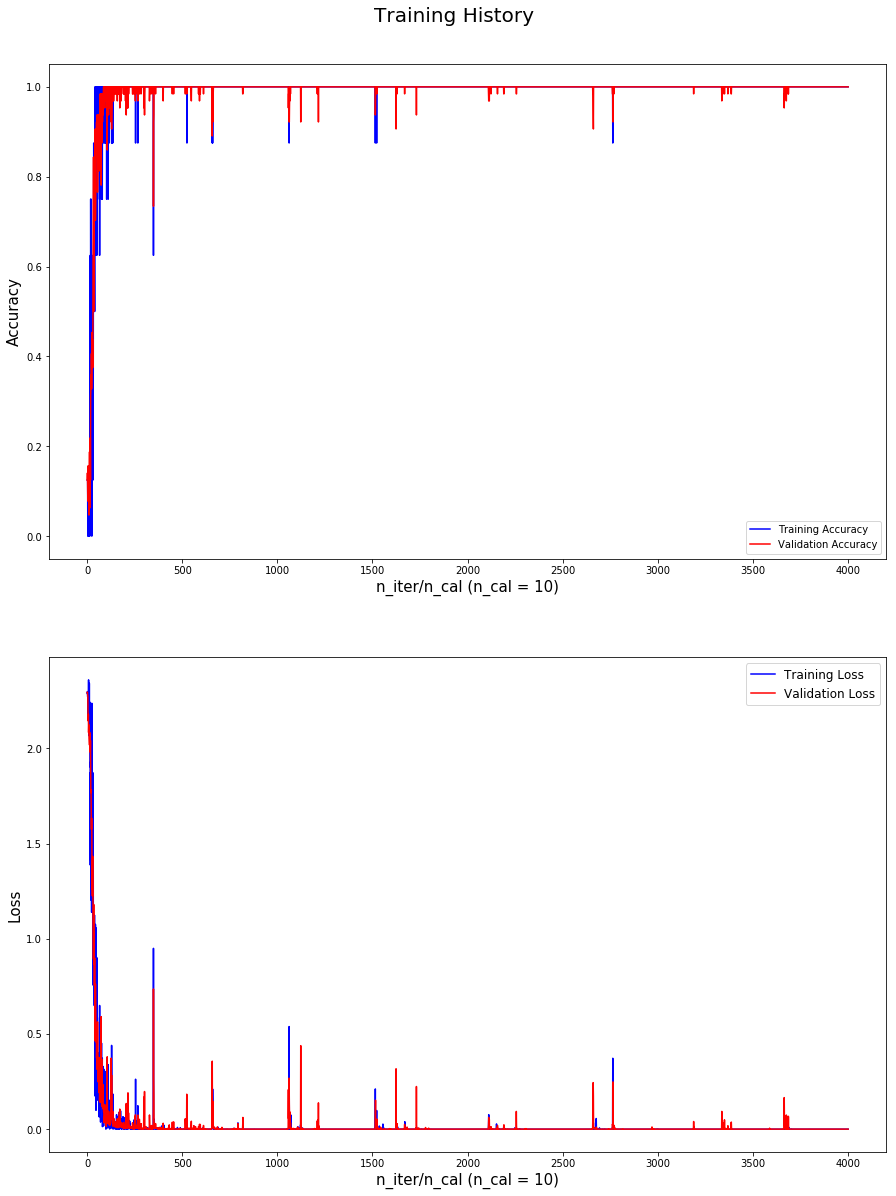

In [9]:
t_batch = 8
v_batch = 64
n_cal = 10
n_prt = 100

n_iter = 0

# LR = 1e-4 # 1e-4 ~ 5e-4 (xavier)
lr = 1e-4

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    optm = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)
# optm = tf.train.AdamOptimizer(lr).minimize(loss)

saver = tf.train.Saver()
sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)
start_time = time.time() 

accr_train, accr_valid, loss_train, loss_valid = [], [], [], []
early_stopping = False

hist = training_history(accr_train, accr_valid, loss_train, loss_valid)
hist.table()

while True:
    train_x, train_y = random_minibatch(train_X, train_Y, batch_size = t_batch)
    train_x, train_y = shuffle(train_x, train_y)
    
    sess.run(optm, feed_dict = {'img:0': train_x, 'label:0': train_y, 'is_training:0' :1})
    n_iter += 1
    if n_iter % n_cal == 0:
        c, p = sess.run([loss, score], feed_dict = {'img:0': train_x, 'label:0': train_y, 'is_training:0' :0})

        p = np.argmax(p, axis = 1)
        l = np.argmax(train_y, axis = 1)
        a = np.mean(np.equal(p, l))
        
        valid_x, valid_y = random_minibatch(valid_X, valid_Y, batch_size = v_batch)
        c_valid, p_valid = sess.run([loss, score], feed_dict = {'img:0': valid_x, 'label:0': valid_y, 'is_training:0' :0})

        p_valid = np.argmax(p_valid, axis = 1)
        l_valid = np.argmax(valid_y, axis = 1)
        a_valid = np.mean(np.equal(p_valid, l_valid))

        accr_valid.append(a_valid)
        loss_valid.append(c_valid)
        accr_train.append(a)
        loss_train.append(c)

        if n_iter % n_prt == 0:
            hist.prt_evl(n_iter)

        if loss_valid[-1] == np.min(loss_valid):
            now = datetime.datetime.now()
            nowDatetime = now.strftime('%y%m%d%H%M')
            model_name = 'hht_6ch_vgg16_{0}_{1}_val_acc_{2:.2f}_val_loss_{3:.6f}'.format(nowDatetime, n_iter, accr_valid[-1], loss_valid[-1])
            saver.save(sess, './model/HHT/' + model_name)
        if n_iter == 40000:
            break
#         if n_iter > 1000:
#             if np.max(accr_train) < 0.9:
#                 if np.mean(loss_train[-50:-30]) <= np.mean(loss_train[-30:]) :
#                     hist.early_under(n_iter)
#                     early_stopping = True
#                     break
#             if np.mean(accr_train[-50:]) >= 0.995:
#                 if (
#                     np.mean(loss_valid[-41:-21]) <= np.mean(loss_valid[-21:-1]) and
#                     loss_valid[-1] < loss_valid[-2] # np.min(loss_valid[-20:]) == loss_valid[-1]
#                     ):
#                     hist.early_over(n_iter)
#                     early_stopping = True
#                     break          

train_time = int((time.time() - start_time)/60)  
hist.done(n_iter, train_time, early_stopping)

np.save('/mnt/disk1/yunseob/courses/19-2_computer vision/history/VGG16_HHT_6ch_accr', np.array(accr_train))
np.save('/mnt/disk1/yunseob/courses/19-2_computer vision/history/VGG16_HHT_6ch_loss', np.array(loss_train))

hist.plot(n_cal)   

# sess.close()